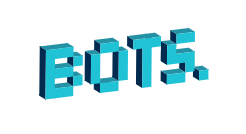

# How To Make A Bot
#### A step by step guide - Part 2
<p>&nbsp;</p>


### Introduction 

This notebook is the second in a series showing what is involved in making and testing a Bot.

In the first notebook we saw how to get some historical market data and how we could use this data to generate a signal. We also ran a backtest on the data to estimate how well our bot would have performed.

In this notebook we will see how to connect and send an order to the Bots platform.

### Accessing Bots:  The low-code solution

The Bots api is a REST api, so no particular arrangements have to be made in order to connect to it; an internet connection suffices. It also means that any programming language can be used. In this notebook we'll use a python api wrapper class to access the Bots platform; using this class we can send an order to the platform in just a few lines of code.  
Before a bot can send messages to the platform, a **key** needs to be generated for the bot; this can be done in the app. The bot **name** and **key** need to be present in every message send to Bots.

#### Importing the api library

In [ ]:
import botslib.bots_api as ba

bots_platform = ba.BEM_API('https://signal.revenyou.io/paper/api/signal/v2/')

#### Preparing the order

The library contains data classes that contain all the fields that must/can be set for a particular api call. If we want to send an order, we have to create a **OrderParameters** class and set it's fields. 

In [ ]:
btc_order = ba.OrderParameters(signalProvider='YourBotName',
                               signalProviderKey='YourBotKey',
                               baseAsset='BTC',
                               quoteAsset='USDT',
                               exchange='binance')

#### Sending the order

Now that we have our 'btc_order' prepared, we can set the side, price and size. The size parameter (qtyPct) is a percentage of the assets allocated to the bot. We also give an id that we can use to keep track of the order.  
Once these field have been set, we send the order to the market by calling **placeOrder**

In [ ]:
btc_order.side = 'buy'
btc_order.limitPrice = '18500'
btc_order.qtyPct = '40'
btc_order.extId = 'Order_1'

bots_platform.placeOrder(btc_order)


That's all! Our order has been accepted by the exchange.  

#### Tracking the order

Now that our order is in the market, we can request what the status is by calling **getOrderState** and get more complete info by calling **getOrderInfo**   
The bot will probably call these functions frequently during the lifetime of the order.

In [ ]:
state_request = ba.OrderStateRequest(signalProvider='YourBotName',signalProviderKey='YourBotKey')

state_request.extId = 'Order_1'
bots_platform.getOrderState(state_request)

In [ ]:
info_request = ba.OrderInfoRequest(signalProvider='YourBotName',signalProviderKey='YourBotKey')

info_request.extId = 'Order_1'
bots_platform.getOrderInfo(info_request)

#### Canceling the order

If the bot logic decides to pull the order, the (remainder of) the order can be cancelled by calling **cancelOrder**.

In [ ]:
cancel_request = ba.CancelOrderParameters(signalProvider='YourBotName',signalProviderKey='YourBotKey')

cancel_request.extId = 'Order_1'
bots_platform.cancelOrder(cancel_request)


***
Question or comments? Let me know: <philip@revenyou.io>